# Monte Carlo Statistics

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import time
import math

In [2]:
def coin_flip(probability=0.5):
    return ( random.random() < probability )*1   # random library has a class random with function random: random.random()

# for i in range(20):
#     print(coin_flip(probability=0.7))

In [3]:
def monte_carlo( nRuns = 10000, probability=0.5 ):
    sum_all = 0
    estimated_fraction = np.zeros(nRuns)
    
    for id_run in range(nRuns):
        sum_all += coin_flip( probability )
        estimated_fraction[id_run] = sum_all/(id_run + 1)
        
    return estimated_fraction

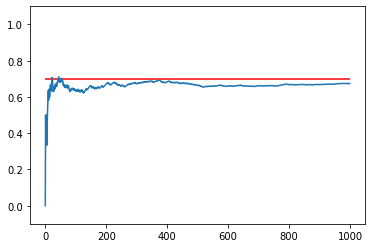

In [6]:
nRuns = 1000
probability=0.7

x_axis = np.arange(nRuns)
y_axis = monte_carlo( nRuns = nRuns, probability=0.7 ) 
plt.plot( x_axis, y_axis )
plt.ylim((-0.1, 1.1))
plt.hlines(y=probability, xmin=0, xmax=nRuns-1, colors='r', linestyles='solid', label='1')
plt.show()

Calculate confidence intervals in regards to the actual probability and the number of runs:

$$
\hat{p} \pm z_{\alpha/2} \sqrt{\frac{\text{Var}\left(X\right) }{n}} = 
\hat{p} \pm z_{\alpha/2} \sqrt{\frac{\hat{p} \left( 1 - \hat{p}\right) }{n}} = 
\hat{p} \pm z_{\alpha/2} \frac{ \sqrt{\hat{p} \left( 1 - \hat{p}\right)} }{ \sqrt{{n}} }
$$

where $z_{\alpha/2}$ gives the "probit": $\Phi^{-1}\left( 1 - \frac{\alpha}{2} \right)$, where $\Phi^{-1}\left(  \right)$ is the inverse of the cumulative distribution function CDF: $\Phi\left( \right)$

Intuition on the CDF function $\Phi\left( z \right)$:

dcf(z): 0.9494974165258963


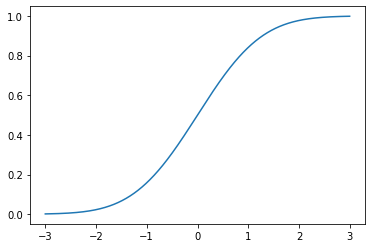

In [7]:
z = 1.64
print( "dcf(z):", st.norm.cdf( z ) )

z_vals = np.arange(-3, 3, 0.001)
cdf_vals = st.norm.cdf( z_vals )

# cdf_vals = z_vals.copy() <- slower!
# for i, z in enumerate(z_vals):
#     cdf_vals[i] = st.norm.cdf( z_vals[i] )

plt.plot(z_vals, cdf_vals)

Intuition on the probit function $\Phi^{-1}\left(  \right)$, which is the inverse of the cumulative distribution function (CDF) $\Phi\left( \right)$:

probit(p): 1.959963984540054


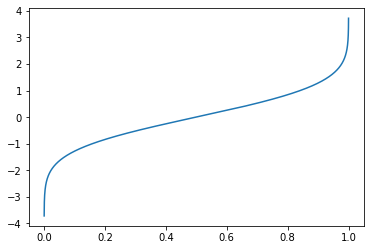

In [8]:
# probit f
p = 0.975
print( "probit(p):", st.norm.ppf(p) ) # <- choice of number inspired from the previous cell.

p_vals = np.arange(0, 1, 0.0001)
ppf_vals = st.norm.ppf( p_vals )

plt.plot(p_vals, ppf_vals )

Because the two functions are inverse, it holds that:

$$
probit(cdf(z)) = \Phi^{-1}\left( \Phi\left( z \right)\right) = z
$$

$$
cdf(probit(p)) = \Phi\left( \Phi^{-1}\left( p \right)\right)  = p
$$

Moving on, the probit $z_{\alpha/2}$ for $\alpha = 0.05$ ( To get 95% confidence interval ) is calculated in the following manner:

$$
z_{\alpha/2} = \Phi^{-1}\left( 1 - \frac{\alpha}{2}\right) = \Phi^{-1}\left( 1 - \frac{0.05}{2}\right) = \Phi^{-1}\left( 0.975\right) = 1.95996 \dots
$$

In [9]:
print( "probit(0.975):", st.norm.ppf(0.975) )

probit(0.975): 1.959963984540054


Let us now calculate the plots of deltas of confidence intervals in regards to the number of runs and actual probability:

In [10]:
def getConfidenceDeltas( nRuns = 10000, probability=0.5, confidence=0.95 ):
    z = st.norm.ppf(  (1 + confidence)/2  ) # derive it!
    deltas = np.arange(1, nRuns+1)
    deltas = 1./np.sqrt(deltas)
    deltas *= z * np.sqrt(( probability * ( 1 - probability )))
    return deltas

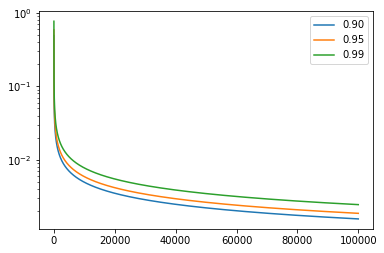

In [11]:
nRuns = 100000
probability = 0.1
c1 = 0.90
c2 = 0.95
c3 = 0.99

plt.title("")
plt.yscale("log")
plt.plot(np.arange(1, nRuns+1), getConfidenceDeltas( nRuns = nRuns, probability=probability, confidence=c1), label="0.90" )
plt.plot(np.arange(1, nRuns+1), getConfidenceDeltas( nRuns = nRuns, probability=probability, confidence=c2), label="0.95" )
plt.plot(np.arange(1, nRuns+1), getConfidenceDeltas( nRuns = nRuns, probability=probability, confidence=c3), label="0.99" )
plt.legend(loc=1)
plt.show()

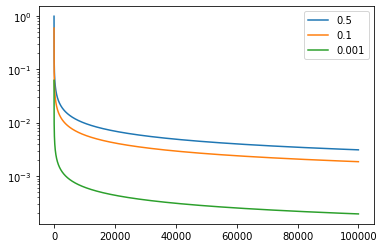

In [12]:
nRuns = 100000
prob1 = 0.5
prob2 = 0.1
prob3 = 0.001
c = 0.95

plt.title("")
plt.yscale("log")
plt.plot(np.arange(1, nRuns+1), getConfidenceDeltas( nRuns = nRuns, probability=prob1, confidence=c ), label="0.5" )
plt.plot(np.arange(1, nRuns+1), getConfidenceDeltas( nRuns = nRuns, probability=prob2, confidence=c ), label="0.1" )
plt.plot(np.arange(1, nRuns+1), getConfidenceDeltas( nRuns = nRuns, probability=prob3, confidence=c ), label="0.001" )
plt.legend(loc=1)
plt.show()

To better understand the source of the difference, let us plot $\sqrt{\hat{p} \left( 1 - \hat{p}\right)}$:

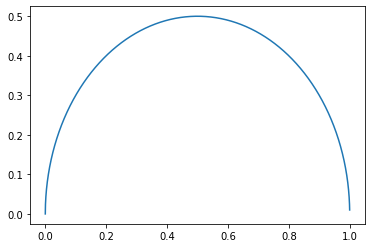

In [13]:
p_vals = np.arange(0,1,0.0001)
y_vals = np.sqrt(p_vals*(1-p_vals))
plt.plot(p_vals, y_vals)

Now for the final task, I will calculate at what nRuns does the lower bound get above 0:

In [14]:
def getNumberOfNeededRuns(prob_vals, thresholds=0, confidence=0.95, maxNumberOfRuns=1000000 ):
    z = st.norm.ppf(  (1 + confidence)/2  )
    # print(z)
    counter = 0
    runs = np.ones((prob_vals.shape))*maxNumberOfRuns
    for p in prob_vals:
        n = 1
        val = p - z*math.sqrt((p*(1-p))/n)
        while val < thresholds[counter]:
            n += 1
            val = p - z*math.sqrt((p*(1-p))/n)
        runs[counter] = n
        counter += 1
    return runs

In [14]:
prob_vals = np.logspace(start= -math.log(2,10), stop=-5, num=100 )

needed_runs =  getNumberOfNeededRuns(prob_vals=prob_vals, thresholds=prob_vals*0  , confidence=0.95, maxNumberOfRuns=1000000 )
needed_runs2 = getNumberOfNeededRuns(prob_vals=prob_vals, thresholds=prob_vals*0.1, confidence=0.95, maxNumberOfRuns=1000000 )
needed_runs3 = getNumberOfNeededRuns(prob_vals=prob_vals, thresholds=prob_vals*0.5, confidence=0.95, maxNumberOfRuns=1000000 )


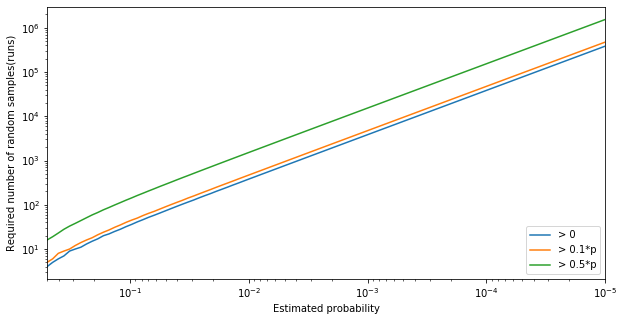

In [15]:
plt.figure(figsize=(10,5))
plt.plot(prob_vals, needed_runs, label="> 0")
plt.plot(prob_vals, needed_runs2, label="> 0.1*p")
plt.plot(prob_vals, needed_runs3, label="> 0.5*p")
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.5,0.00001)
plt.legend(loc=4)
plt.xlabel("Estimated probability")
plt.ylabel("Required number of random samples(runs)")
plt.show()

In [16]:
def getNumberOfNeededRuns2(prob_vals, k=0.5, confidence=0.95 ):
    z = st.norm.ppf(  (confidence + 1)/2  ) 
    print(z)
    runs = (z*np.sqrt(prob_vals*(1-prob_vals))/(prob_vals*k))**2

    #print(runs)
    return runs

prob_vals = np.logspace(start= -math.log(2,10), stop=-5, num=100 )

needed_runs_nov =  getNumberOfNeededRuns2(prob_vals=prob_vals, k=1  , confidence=0.95 )
needed_runs2_nov = getNumberOfNeededRuns2(prob_vals=prob_vals, k=0.8, confidence=0.95 )
needed_runs3_nov = getNumberOfNeededRuns2(prob_vals=prob_vals, k=0.5, confidence=0.95 )
needed_runs4_nov = getNumberOfNeededRuns2(prob_vals=prob_vals, k=0.2, confidence=0.95 )

1.959963984540054
1.959963984540054
1.959963984540054
1.959963984540054


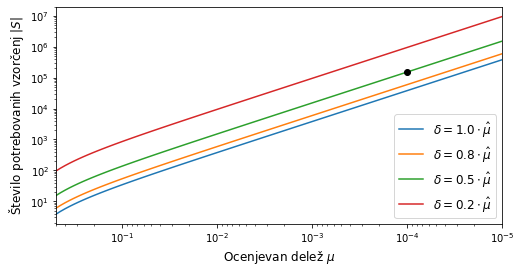

In [21]:
# After calculating a better estimate:

plt.figure(figsize=(8,4))
stringi = r'$\delta = 1.0 \cdot \mu$'
plt.plot(prob_vals, needed_runs_nov , label=r'$\delta = 1.0 \cdot \hat\mu$' )
plt.plot(prob_vals, needed_runs2_nov, label=r'$\delta = 0.8 \cdot \hat\mu$' )
plt.plot(prob_vals, needed_runs3_nov, label=r'$\delta = 0.5 \cdot \hat\mu$' )
plt.plot(prob_vals, needed_runs4_nov, label=r'$\delta = 0.2 \cdot \hat\mu$' )
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.5,0.00001)
plt.legend(loc=4, prop={'size': 12})
plt.xlabel("Ocenjevan delež " + r'$\mu$', fontsize=12)
plt.ylabel("Število potrebovanih vzorčenj " + r'$|S|$', fontsize=12 )
plt.plot(0.0001, 153642.9, 'o', color='black')
plt.show()

In [20]:
# %matplotlib qt
%matplotlib inline

In [22]:
mi = 0.0001
num = ( st.norm.ppf(  (0.95 + 1)/2  )* (np.sqrt(mi*(1-mi)))/(mi*0.5))**2
print(num)

153642.9869924822
